###  Basic classification: Classify images of clothing 

In [5]:
import tensorflow as tf , numpy as np , matplotlib.pyplot as plt

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Explore the data

In [14]:
train_images.shape



(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

#### Preprocess the data 

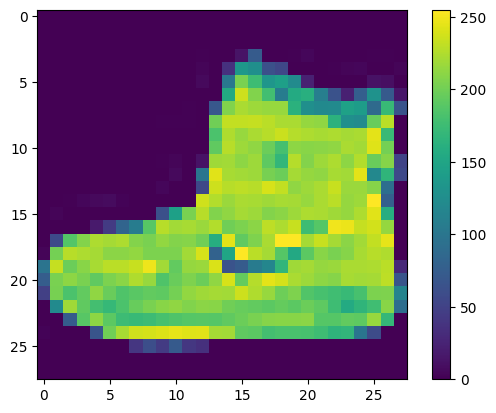

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
train_images = train_images / 255.0
test_images = test_images / 255.0

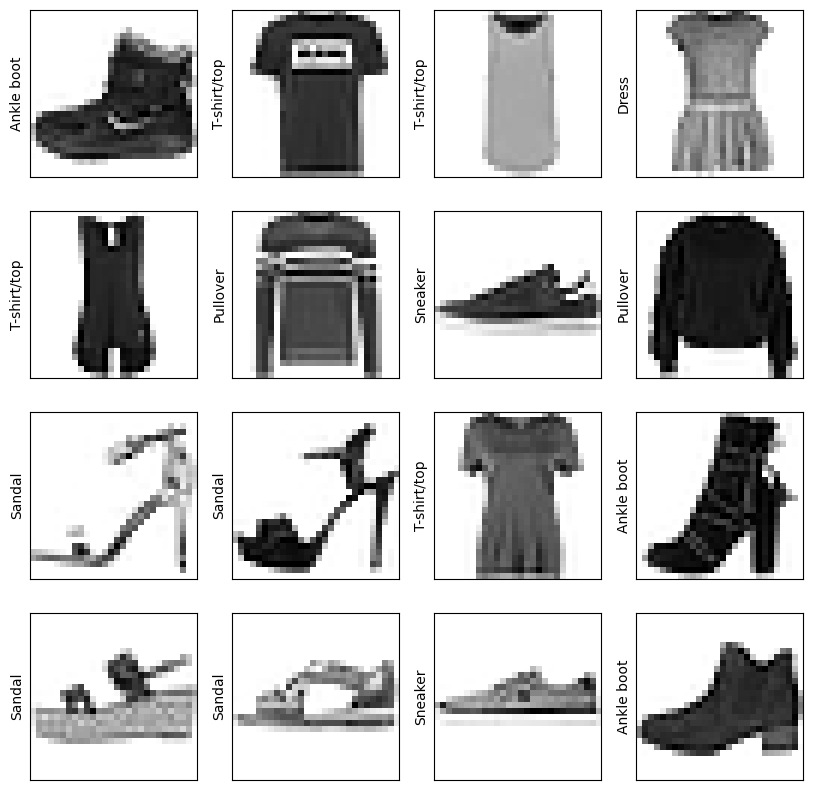

In [29]:
plt.figure(figsize = (10,10))
for i in range(16):
    plt.subplot(4 , 4 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap = plt.cm.binary)
    # print(train_labels[i])
    plt.ylabel(class_names[train_labels[i]])
plt.show()

#### Build the Model

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [45]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [46]:
model.compile(
    optimizer = "adam" , 
    loss = loss_func ,
    metrics = ['accuracy']
)

#### Train the model

In [47]:
model.fit(train_images , train_labels , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.7835 - loss: 0.6313
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.8631 - loss: 0.3846
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8753 - loss: 0.3430
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.8871 - loss: 0.3118
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.8906 - loss: 0.2968
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.8986 - loss: 0.2772
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.8999 - loss: 0.2694
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.9038 - loss: 0.2586
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.9061 - loss: 0.2499
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9095 - loss: 0.2411


In [49]:
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose = 2)

313/313 - 0s - 314us/step - accuracy: 0.8769 - loss: 0.3455


In [50]:
test_acc

0.8769000172615051

In [52]:
probability_model = tf.keras.Sequential([
    model , 
    tf.keras.layers.Softmax()
])

In [53]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


In [54]:
predictions[0]

array([1.4817931e-06, 1.0015881e-09, 5.5758626e-08, 8.7641188e-12,
       5.4826263e-08, 8.0300364e-05, 1.2462267e-07, 1.4400771e-03,
       1.1781536e-08, 9.9847782e-01], dtype=float32)

In [55]:
np.argmax(predictions[0])

9

In [56]:
test_labels[0]

9

Define functions to grapth the full set of 10 class predictions

In [58]:
def plot_image(i , predictions_array , true_label , img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array) , class_names[true_label]),color=color)

In [59]:
def plot_value_array(i , predictions_array , true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10) , predictions_array , color = "#777777")
    plt.ylim([0 , 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

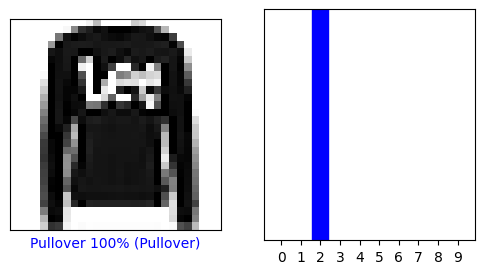

In [60]:
i = 1 

plt.figure(figsize = (6 , 3))
plt.subplot(1 , 2 , 1)
plot_image(i , predictions[i] , test_labels , test_images)

plt.subplot(1,2,2)
plot_value_array(i , predictions[i] , test_labels)
plt.show()

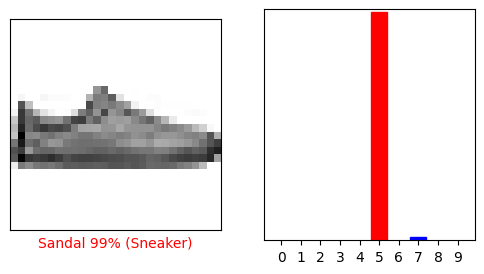

In [61]:
i = 12 

plt.figure(figsize = (6 , 3))
plt.subplot(1 , 2 , 1)
plot_image(i , predictions[i] , test_labels , test_images)

plt.subplot(1,2,2)
plot_value_array(i , predictions[i] , test_labels)
plt.show()

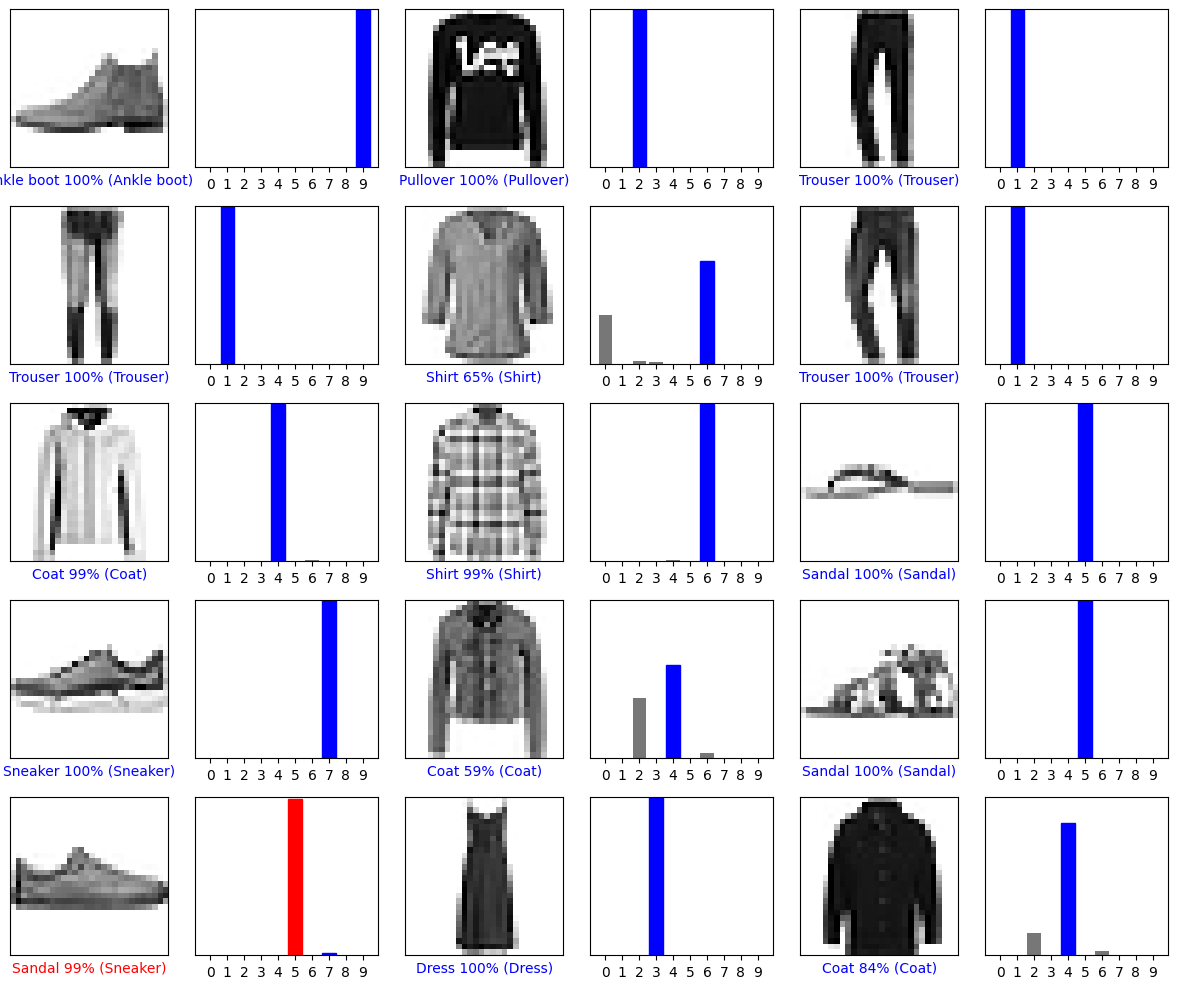

In [62]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols  

plt.figure(figsize = (2*2*num_cols , 2*num_rows))
for i in range(num_images):
   plt.subplot(num_rows , 2*num_cols, 2*i+1)
   plot_image(i , predictions[i] , test_labels , test_images)
   plt.subplot(num_rows , 2*num_cols, 2*i+2)
   plot_value_array(i , predictions[i] , test_labels)
plt.tight_layout()
plt.show()

#### Use the trained model

In [63]:
img = test_images[1]

print(img.shape)

(28, 28)


In [64]:
img = (np.expand_dims(img , 0))
print(img.shape)

(1, 28, 28)


In [65]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[1.6071570e-04 2.7626813e-13 9.9943715e-01 3.2094047e-12 6.1486040e-05
  3.7082178e-13 3.4058254e-04 3.1912504e-16 1.4153525e-09 1.2420276e-11]]


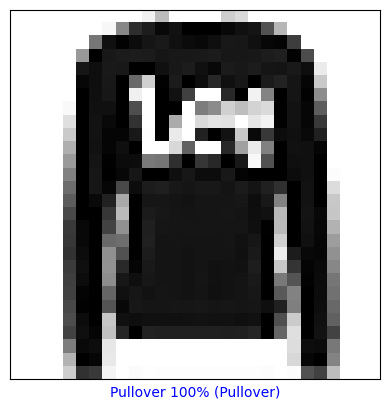

In [66]:
plot_image(1, predictions_single[0] ,test_labels , test_images)

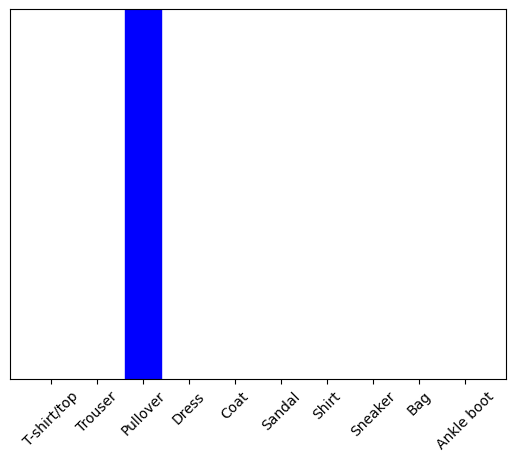

In [68]:
plot_value_array(1 , predictions_single[0] , test_labels)
_ = plt.xticks(range(10) , class_names , rotation = 45)

plt.show()

In [69]:
np.argmax(predictions_single[0])

2